# Web Scraping para NLP

Parte práctica

1. Explicación técnica de Selenium, sin profundizar
1. DEMO de funcionamiento paso a paso
1. Exploración usando portales de noticias

## Selenium

### Qué es exactamente

Headless browser con una interfaz para la comunicación entre navegadores.\
Es decir, es la suite completa de librería + driver api para poder automatizar acciones con navegadores

### Para qué sirve

- Testing automático y e2e
- Automatizar procesos rutinarios (fichar en plataformas, iniciar sesión, etc.)
- Web scraping

### Arquitectura

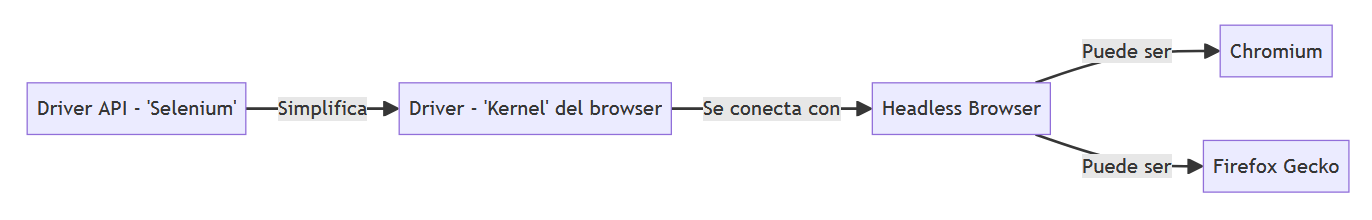

1. La API es dependiente del lenguaje que se esté utilizando
    - La librería podrá cambiar sintaxis aún manteniendo conceptos
    - El funcionamiento será muy parecido, pero con las peculiaridades de cada lenguaje (Python GIL, Java JVM)
1. El driver es la conexión específica de la librería con el headless browser, es el elemento común
    - Java usa un JVM para proporcionar un lenguaje unificado sin importar el Sistema Operativo
    - Selenium tiene un driver que se conectará con cada navegador (o "será" el navegador)
1. Headless Browser, el _flavor_ del navegador tiene diferencias y soportes, user-agents diferentes, motores diferentes
    - Teniendo un elemento que unifica conceptos (driver) y una librería que permite comunicarse en varios lenguajes, puede ser que necesitemos diferentes navegadores, ahí entran los navegadores que queramos usar
    - Google Chrome usa el motor de Chromium (y la mayoría de los navegadores también), Firefox tiene su propio motor (Gecko), y Safari también (WebKit)

## Portales de Noticias

* La razón
* El Mundo
* ABC
* El Pais
* 20 minutos
* Marca

## Preparación

### Imports generales

In [ ]:
# HTTP requests
import requests
# Date handler utility
import datetime
# Mark-Language parsing
import bs4
# DataFrame Manager
import pandas
# Random
import random
random.seed = 42
# Thread management (sleep purposes)
import time
# Operating System management
import os

### Instalación de Selenium en Google Colab

In [ ]:
!pip install -q google-colab-selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.2 MB/s eta 0:00:00


In [ ]:
# Selenium workaround for Gooble Colab
import google_colab_selenium

# Selenium specific libraries
from selenium.webdriver.common.by import By
from selenium import webdriver

### Configuración de Selenium

In [ ]:
USER_AGENT = ""

In [ ]:
options = webdriver.ChromeOptions()

options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

if USER_AGENT:
  options.add_argument(f"user-agent={USER_AGENT}")

driver = google_colab_selenium.Chrome(options=options)

<IPython.core.display.Javascript object>

### Playground

Visualización de lo que está ocurriendo en el navegador\
_en local sería más fácil, podríamos configurar que se nos abriese el navegador_

```python
driver.save_screenshot("...name.png")
```

Con directorio propio para poder ubicar las capturas de pantalla

In [ ]:
if not os.path.exists("playground"):
  os.makedirs("playground")

In [ ]:
driver.save_screenshot("playground/00-init.png")

True

In [ ]:
driver.get("https://google.com/")
driver.save_screenshot("playground/01-enter-google.png")

True

In [ ]:
search_bar = driver.find_element(by=By.TAG_NAME, value="textarea")
search_bar.send_keys("¡Hola Mundo!")
driver.save_screenshot("playground/02-fill-search-bar.png")

True

In [ ]:
search_button = driver.find_element(by=By.CSS_SELECTOR, value='input[type="submit"]')
search_button.click()

time.sleep(2) # segundos
driver.save_screenshot("playground/03-searching.png")

True

## DEMO

### Ir a una página

In [ ]:
TARGET_URL = "https://google.com/"
driver.get(TARGET_URL)

### Búsqueda de elementos

Para extraer información, necesitamos _objetivos_ con los que interactuar, estos objetivos los **buscamos**

#### Por nodo

In [ ]:
by_node = driver.find_elements(by=By.TAG_NAME, value="div")
len(by_node)

1604

#### Por clase CSS

In [ ]:
by_class = driver.find_elements(by=By.CLASS_NAME, value="aaaaa")
len(by_class)

0

#### Por ID

In [ ]:
by_id = driver.find_elements(by=By.ID, value="aaaaa")
len(by_id)

0

#### Por selector CSS

In [ ]:
by_querySelector = driver.find_elements(by=By.CSS_SELECTOR, value="div > img")
len(by_querySelector)

40

### Extracción del contenido

#### De la página

'<head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>¡Hola Mundo! - Google Search</title><script type="text/javascript" id="www-widgetapi-script" src="https://www.youtube.com/s/player/1ced3a71/www-widgetapi.vflset/www-widgetapi.js" async="" nonce=""></script><script nonce="">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'8yIUZpaoN4LK2roPjPaJmAE\',kEXPI:\'31\',kBL:\'xy4R\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'en\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function 
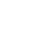
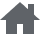
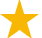
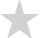
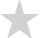
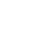
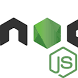
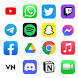
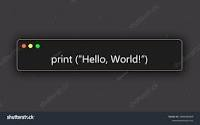
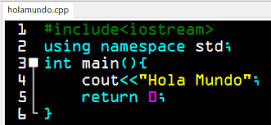
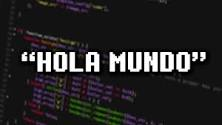
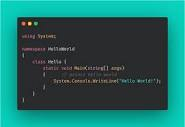
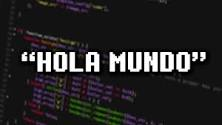
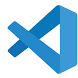
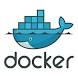
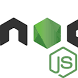
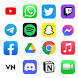
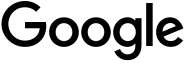
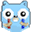

In [ ]:
content = driver.find_element(by=By.TAG_NAME, value="html").get_attribute("innerHTML")
content

#### De un atributo

In [ ]:
content = driver.find_element(by=By.TAG_NAME, value="img").get_attribute("src")
content

'https://www.google.com/logos/doodles/2024/solar-eclipse-2024-6753651837110497.4-shs.png'

### Interacciones

#### Rellenar un formulario

In [ ]:
# elemento que espera interacción de tecla
element = driver.find_element(by=By.CSS_SELECTOR, value="textarea")
element.send_keys("Envía cada una de las teclas como interacción de usuario")

#### Interacción con click

In [ ]:
# elemento que espera interacción de click
element = driver.find_element(by=By.CSS_SELECTOR, value="button")
element.click()

#### Interacción con scroll

Import específico

In [ ]:
from selenium.webdriver import ActionChains

In [ ]:
amount = 20
ActionChains(driver).scroll_by_amount(0, amount).perform()

### Cerrar la sesión

Cuando terminas, por costumbre y por el bien de todas las partes involucradas, es buena práctica cerrar la sesión

- Menos recursos consumidos
- Pool de procesos liberada
- Tienes control de que ya has terminado (y no se ha quedado nada colgado)

In [ ]:
driver.close()

# Portales de noticias

Iniciamos una sesión, la sesión anterior la hemos cerrado

In [ ]:
driver = google_colab_selenium.Chrome(options=options)

<IPython.core.display.Javascript object>

In [ ]:
driver.maximize_window()

## El País

### Preparación

In [ ]:
if not os.path.exists("portales/el-pais"):
  os.makedirs("portales/el-pais")

In [ ]:
CONFIGURATION = {
    "BASE_URL": "https://elpais.com/",
}

### Inicio... y las cookies

In [ ]:
driver.get(CONFIGURATION["BASE_URL"])
driver.save_screenshot("portales/el-pais/00-homepage.png")

Aceptar cookies

In [ ]:
driver.find_element(by=By.CLASS_NAME, value="pmConsentWall-button").click()
time.sleep(1) # segundos
driver.save_screenshot("portales/el-pais/01-homepage-no-cookies.png")

### Recupera artículos

In [ ]:
driver.find_element(by=By.CSS_SELECTOR, value=".sm._df a").click()
time.sleep(2) # segundos
driver.save_screenshot("portales/el-pais/02-internacional.png")

True

In [ ]:
articles = driver.find_elements(by=By.CSS_SELECTOR, value="article a")
article_links = [article.get_attribute("href") for article in articles]
len(article_links)

77

### Extrae información de un artículo

In [ ]:
def get_article_content(link: str):
  driver.get(link)
  driver.save_screenshot("portales/el-pais/03-article.png")

  return {
      "title": driver.find_element(by=By.CSS_SELECTOR, value="h1").get_attribute("innerText").strip(),
      "subtitle": driver.find_element(by=By.CSS_SELECTOR, value="h2").get_attribute("innerText").strip(),
      "cover_img": driver.find_element(by=By.CSS_SELECTOR, value="header figure img").get_attribute("src"),
      "body": driver.find_element(by=By.CSS_SELECTOR, value="header + div + div").get_attribute("innerHTML")
  }

In [ ]:
TEST_QUANTITY = 1
demo_article_links = article_links[:TEST_QUANTITY]
parsed_articles = []

for article in demo_article_links:
  parsed_articles.append(get_article_content(article))

### Guardar información

In [ ]:
df = pandas.DataFrame(parsed_articles)
df

,title,subtitle,cover_img,body
0,Israel apunta hacia una tregua tras retirar su...,Líderes políticos y militares multiplican sus ...,https://imagenes.elpais.com/resizer/dlhF6HzZIj...,"<p class="""">En las últimas 24 horas, líderes p..."


In [ ]:
current_time = datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
df.to_csv(f"portales/el-pais/data-{current_time}.csv", sep=";", encoding="utf-8")

## 20 minutos

### Preparación

In [ ]:
if not os.path.exists("portales/20-minutos"):
  os.makedirs("portales/20-minutos")

In [ ]:
CONFIGURATION = {
    "BASE_URL": "https://www.20minutos.es/",
}

### Inicio... y las cookies

In [ ]:
driver.get(CONFIGURATION["BASE_URL"])
driver.save_screenshot("portales/20-minutos/00-homepage.png")

True

Aceptar cookies

In [ ]:
try:
  driver.find_element(by=By.CSS_SELECTOR, value=".mrf-button.accept").click()
  time.sleep(2) # segundos
  driver.save_screenshot("portales/20-minutos/01-homepage-no-cookies.png")
except:
  print("No cookies wall")

No cookies wall


### Recupera artículos

In [ ]:
driver.find_element(by=By.CSS_SELECTOR, value=".default-menu a").click()
time.sleep(2) # segundos
driver.save_screenshot("portales/20-minutos/02-nacional.png")

True

In [ ]:
articles = driver.find_elements(by=By.CSS_SELECTOR, value="article a")
article_links = [article.get_attribute("href") for article in articles]
len(article_links)

75

### Extrae información de un artículo

In [ ]:
def get_article_content(link: str):
  driver.get(link)
  driver.save_screenshot("portales/20-minutos/03-article.png")

  return {
      "title": driver.find_element(by=By.CSS_SELECTOR, value="h1").get_attribute("innerText").strip(),
      "subtitle": driver.find_element(by=By.CSS_SELECTOR, value=".article-intro").get_attribute("innerText").strip(),
      "cover_img": driver.find_element(by=By.CSS_SELECTOR, value=".image-container img").get_attribute("src"),
      "body": driver.find_element(by=By.CSS_SELECTOR, value=".article-text").get_attribute("innerText")
  }

In [ ]:
TEST_QUANTITY = 1
demo_article_links = article_links[:TEST_QUANTITY]
parsed_articles = []

for article in demo_article_links:
  parsed_articles.append(get_article_content(article))

### Guardar información

In [ ]:
df = pandas.DataFrame(parsed_articles)
df

,title,subtitle,cover_img,body
0,Sigue el fenómeno visible en España,La instructora plantea que preste declaración ...,https://imagenes.20minutos.es/files/image_640_...,La magistrada del Tribunal Supremo Susana Polo...


In [ ]:
current_time = datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
df.to_csv(f"portales/20-minutos/data-{current_time}.csv", sep=";", encoding="utf-8")

# Alternativas a Selenium

No es la única opción del mercado, pero sí la más conocida.\
Y agnóstica hasta cierto punto con respecto al lenguaje necesario

El código que se muestra es de **ejemplo**. ¡¡No va a funcionar!!

## Scrapy

## Puppeteer

## Cypress

## Playwright